# Visualizing affected correctors

We know that the error indicator is dependent on the patch size. It might occur that some elements are not even affected by the perturbation. This effect is visualized by the following script.

In [1]:
import os
import sys
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from visualize import drawCoefficient, drawCoefficientGrid, drawCoefficientwg

from gridlod import interp, coef, util, fem, world, linalg
import pg_rand, femsolverCoarse, buildcoef2d
from gridlod.world import World

We construct a standard diffusion coefficient and perform some perturbation. Afterwards, we visualize the affected correctors dependent on the patch size $k$. For $k=5$, the error indicator has a non zero value for each coarse element. We use this fact, to construct the remaining figures in the thesis and we recognize the logarithm decrease and the peaks in the directly perturbed elements.    

<IPython.core.display.Javascript object>


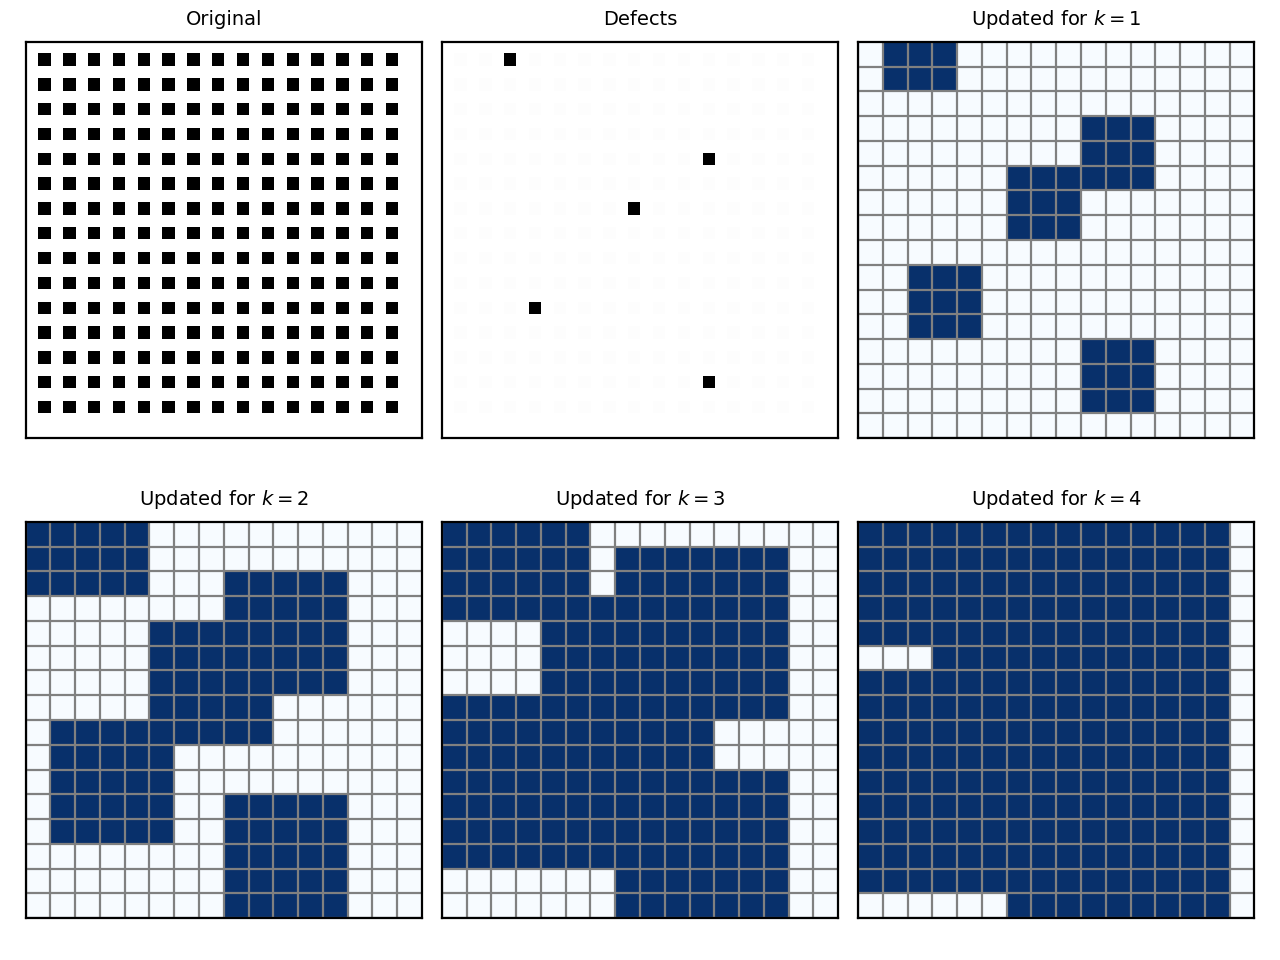

<<<<<<<<<<<<<<<< k = 1 >>>>>>>>>>>>>>>>
To be recomputed:  16.40625 %
Not Recomputed!
<<<<<<<<<<<<<<<< k = 2 >>>>>>>>>>>>>>>>
To be recomputed:  42.1875 %
Not Recomputed!
<<<<<<<<<<<<<<<< k = 3 >>>>>>>>>>>>>>>>
To be recomputed:  71.09375 %
Not Recomputed!
<<<<<<<<<<<<<<<< k = 4 >>>>>>>>>>>>>>>>
To be recomputed:  90.234375 %
Not Recomputed!
<<<<<<<<<<<<<<<< k = 5 >>>>>>>>>>>>>>>>
To be recomputed:  100.0 %
Not Recomputed!


<IPython.core.display.Javascript object>


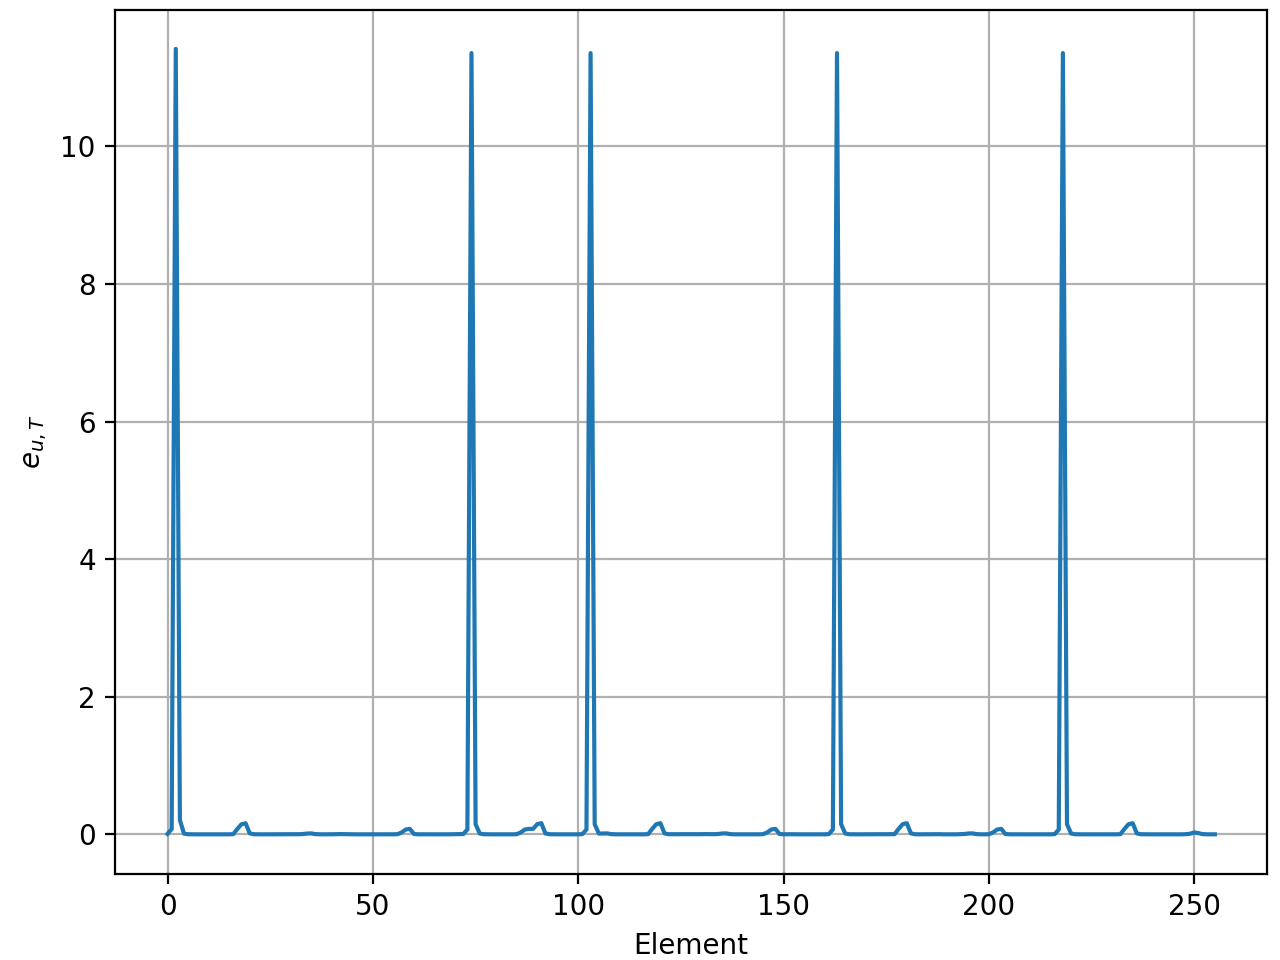

<IPython.core.display.Javascript object>


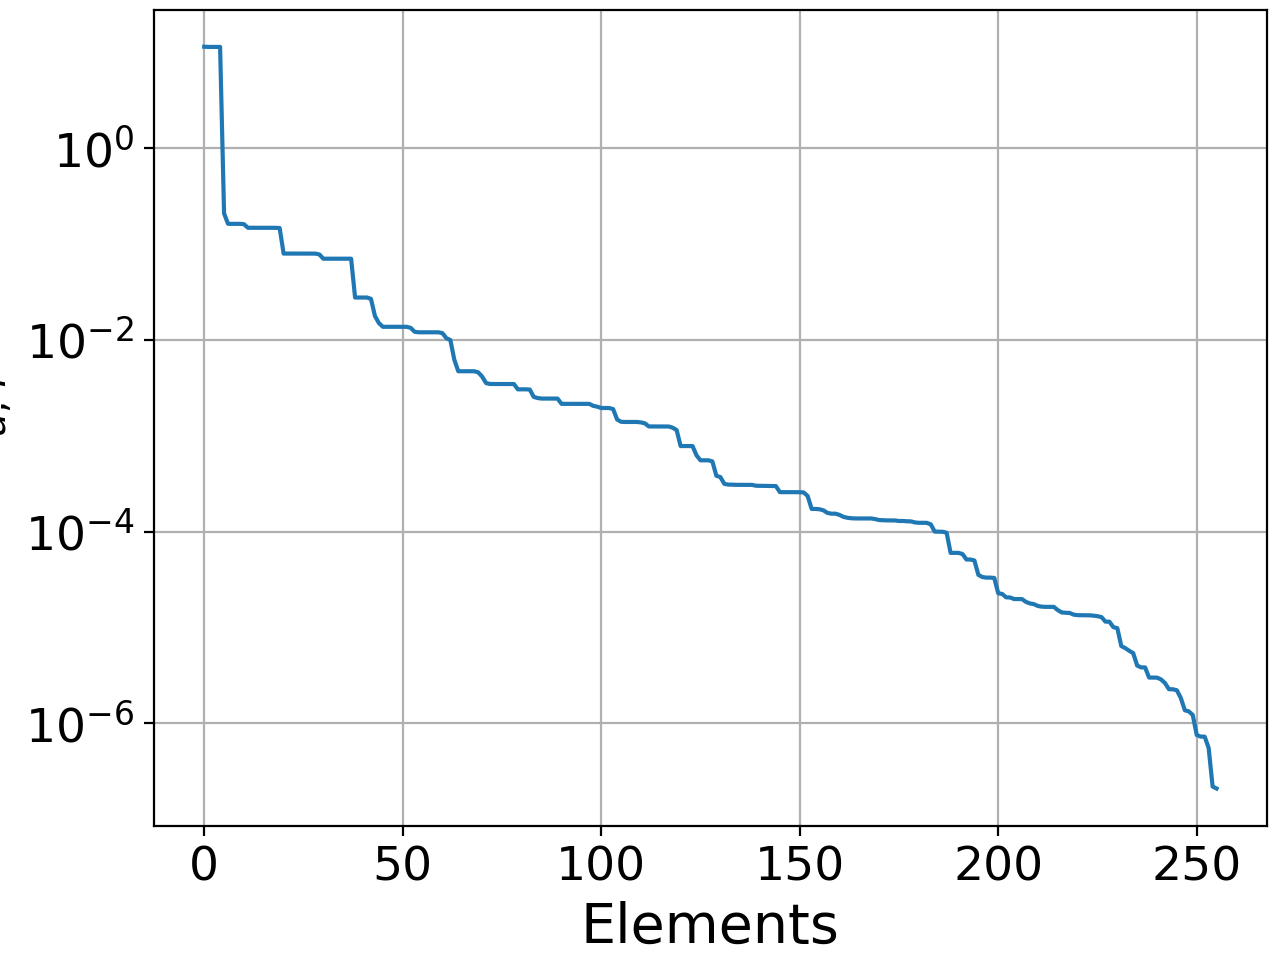

In [2]:
bg = 0.05      #background
val = 1        #values

#fine World
NWorldFine = np.array([256, 256])
NpFine = np.prod(NWorldFine+1)                                                                               

#coarse World
NWorldCoarse = np.array([16,16])
NpCoarse = np.prod(NWorldCoarse+1)

#ratio between Fine and Coarse
NCoarseElement = NWorldFine/NWorldCoarse

boundaryConditions = np.array([[0, 0],
                               [0, 0]])

world = World(NWorldCoarse, NCoarseElement, boundaryConditions)

#righthandside
f = np.ones(NpCoarse)

#coefficient
CoefClass = buildcoef2d.Coefficient2d(NWorldFine, 
                                    bg                  = 0.05, 
                                    val                 = 1, 
                                    length              = 8, 
                                    thick               = 8, 
                                    space               = 8, 
                                    probfactor          = 1, 
                                    right               = 1, 
                                    down                = 0, 
                                    diagr1              = 0, 
                                    diagr2              = 0, 
                                    diagl1              = 0, 
                                    diagl2              = 0, 
                                    LenSwitch           = None, 
                                    thickSwitch         = None, 
                                    equidistant         = True, 
                                    ChannelHorizontal   = None, 
                                    ChannelVertical     = None,
                                    BoundarySpace       = True)

A = CoefClass.BuildCoefficient()
ABase = A.flatten()

# potentially updated
fig = plt.figure("Correcting")
ax = fig.add_subplot(2,3,1)
ax.set_title('Original', fontsize=7)
drawCoefficientwg(NWorldFine, ABase,fig,ax,Greys=True)

numbers = [2,70,97,153,205]

R = CoefClass.SpecificVanish(           Number              = numbers,
                                        probfactor          = 1,
                                        PartlyVanish        = None,
                                        Original            = True)
                                
value2 = 50
R2 = CoefClass.SpecificValueChange(     ratio               = value2,
                                        Number              = numbers,
                                        probfactor          = 1,
                                        randomvalue         = None,
                                        negative            = None,
                                        ShapeRestriction    = True,
                                        ShapeWave           = None,
                                        Original            = True,
                                        NewShapeChange      = True)

# precompute
NWorldFine = world.NWorldFine
NWorldCoarse = world.NWorldCoarse
NCoarseElement = world.NCoarseElement

boundaryConditions = world.boundaryConditions
NpFine = np.prod(NWorldFine+1)
NpCoarse = np.prod(NWorldCoarse+1)

#interpolant
IPatchGenerator = lambda i, N: interp.L2ProjectionPatchMatrix(i, N, NWorldCoarse, NCoarseElement, boundaryConditions)

#old Coefficient (need flatten form)
Aold = coef.coefficientFine(NWorldCoarse, NCoarseElement, ABase)

for k in range(1,6):
    print '<<<<<<<<<<<<<<<< k = ' + str(k) + ' >>>>>>>>>>>>>>>>'
    pglod = pg_rand.VcPetrovGalerkinLOD(Aold, world, k, IPatchGenerator, 1)
    pglod.originCorrectors(clearFineQuantities=False)
    
    #new Coefficient
    ANew = R.flatten()
    Anew = coef.coefficientFine(NWorldCoarse, NCoarseElement, ANew)
    
    # tolerance = 0
    vis, eps = pglod.updateCorrectors(Anew, 0, f, 1,clearFineQuantities=False, Computing = False)
    
    elemente = np.arange(np.prod(NWorldCoarse))
    
    if k==5:
        plt.figure("Error indicator")
        plt.plot(elemente,eps)
        plt.ylabel('$e_{u,T}$')
        plt.xlabel('Element')
        plt.subplots_adjust(left=0.09,bottom=0.09,right=0.99,top=0.99,wspace=0.2,hspace=0.2)
        plt.grid()
        
        eps.sort()
        es = []
        for i in range(0,np.size(eps)):
            es.append(eps[np.size(eps)-i-1])
    
        plt.figure("Error indicator log")
        plt.semilogy(elemente,es,label='e_{u,T}')
        elemente = np.arange(np.prod(NWorldCoarse))
        plt.ylabel('$e_{u,T}$',fontsize=20)
        plt.xlabel('Elements',fontsize=20)
        plt.subplots_adjust(left=0.12,bottom=0.14,right=0.99,top=0.99,wspace=0.2,hspace=0.2)
        plt.grid()
        plt.tick_params(axis='both', which='major', labelsize=17)
        plt.tick_params(axis='both', which='minor', labelsize=17)
    
    #potentially updated
    fig = plt.figure("Correcting")
    if k == 1:
        ax = fig.add_subplot(2,3,k+2)
        ax.set_title('Updated for $k=$'+str(k),fontsize=7)
    elif k ==2:
        ax = fig.add_subplot(2,3,k+2)
        ax.set_title('Updated for $k=$'+str(k),fontsize=7)
    elif k ==3:
        ax = fig.add_subplot(2,3,k+2)
        ax.set_title('Updated for $k=$'+str(k),fontsize=7)
    elif k ==4:
        ax = fig.add_subplot(2,3,k+2)
        ax.set_title('Updated for $k=$'+str(k),fontsize=7)
    if k!=5:
        drawCoefficientGrid(NWorldCoarse, vis,fig,ax)

fig = plt.figure("Correcting")                                                               
ax = fig.add_subplot(2,3,2)     
ax.set_title('Defects', fontsize=7)                                                 
drawCoefficientwg(NWorldFine, R2,fig,ax, Greys=True)

plt.show()